                                  Sales Channel Prediction Case Study  

In [89]:
!pip install xgboost

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Step1: Loading of the Dataset

In [10]:
AdvData = pd.read_csv('Advertising.csv')

In [11]:
AdvData.shape

(200, 5)

In [12]:
AdvData

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


 # Step 2: Dropping the unnecessary "Unnamed:0" column

In [13]:
AdvData.drop(columns = 'Unnamed: 0',inplace = True) 

In [14]:
AdvData

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Step 3: checking the dataset info and statatics 

In [15]:
AdvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
AdvData.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Step 4 Checking null value

In [17]:
AdvData.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no values missing from the dataset

#  Step 5 Checking for 0 values in dataset

In [19]:
(AdvData==0).sum()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

"Radio" has a "0" value

#  Step 5: Interpreting relationship between dependent and independent

# Visualising Target value

<AxesSubplot:xlabel='sales', ylabel='Density'>

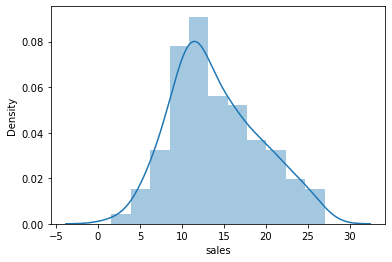

In [20]:
sns.distplot(AdvData['sales'])

In [21]:
AdvData['sales'].skew()

0.4075714250767127

Label data is fairly normally distributed

In [22]:
x = AdvData.drop(columns=['sales'])
y = AdvData['sales']

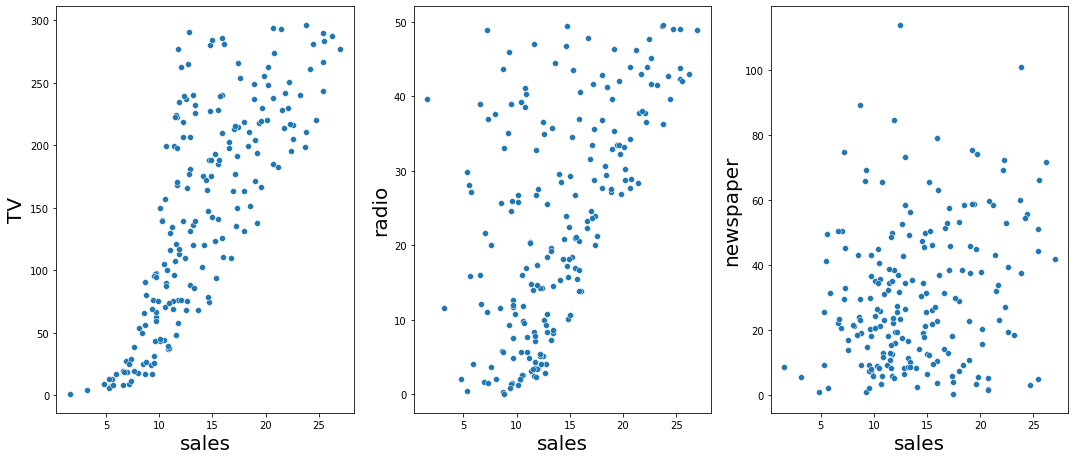

In [23]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum=1

for col in x:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.scatterplot(y,x[col])
        plt.xlabel('sales',fontsize = 20)
        plt.ylabel(col,fontsize = 20)
    plotnum+=1
plt.tight_layout()

It is observed that there is a positive linear relationship between "TV" and "Sales", "Radio" and "Sales"

<Figure size 1440x1800 with 0 Axes>

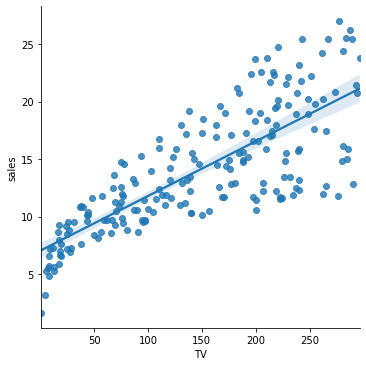

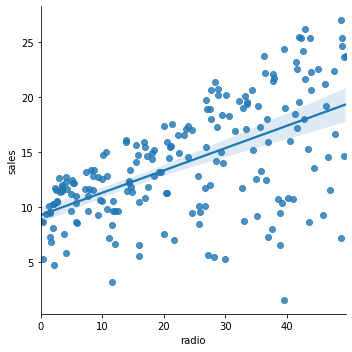

In [24]:
plt.figure(figsize = (20,25),facecolor = 'white')
sns.lmplot(x = 'TV',y='sales',data = AdvData)
sns.lmplot(x = 'radio',y = 'sales',data =AdvData)
plt.tight_layout()

#  Step 6 Finding correlation

In [25]:
a_corr = AdvData.corr()
a_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


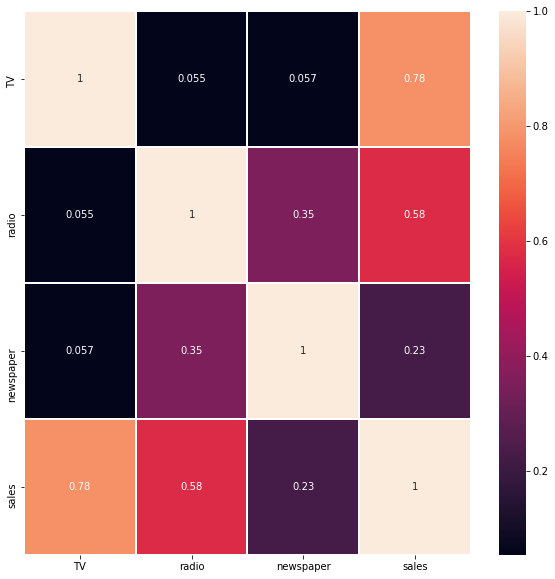

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(a_corr,annot = True,linewidth=1)
plt.show()

"Sales" has the highest correlation with "TV" followed by "Radio" and bit weak correlation with "Newspaper"

#  Step 7 :Visualising correlation of feature columns with label column

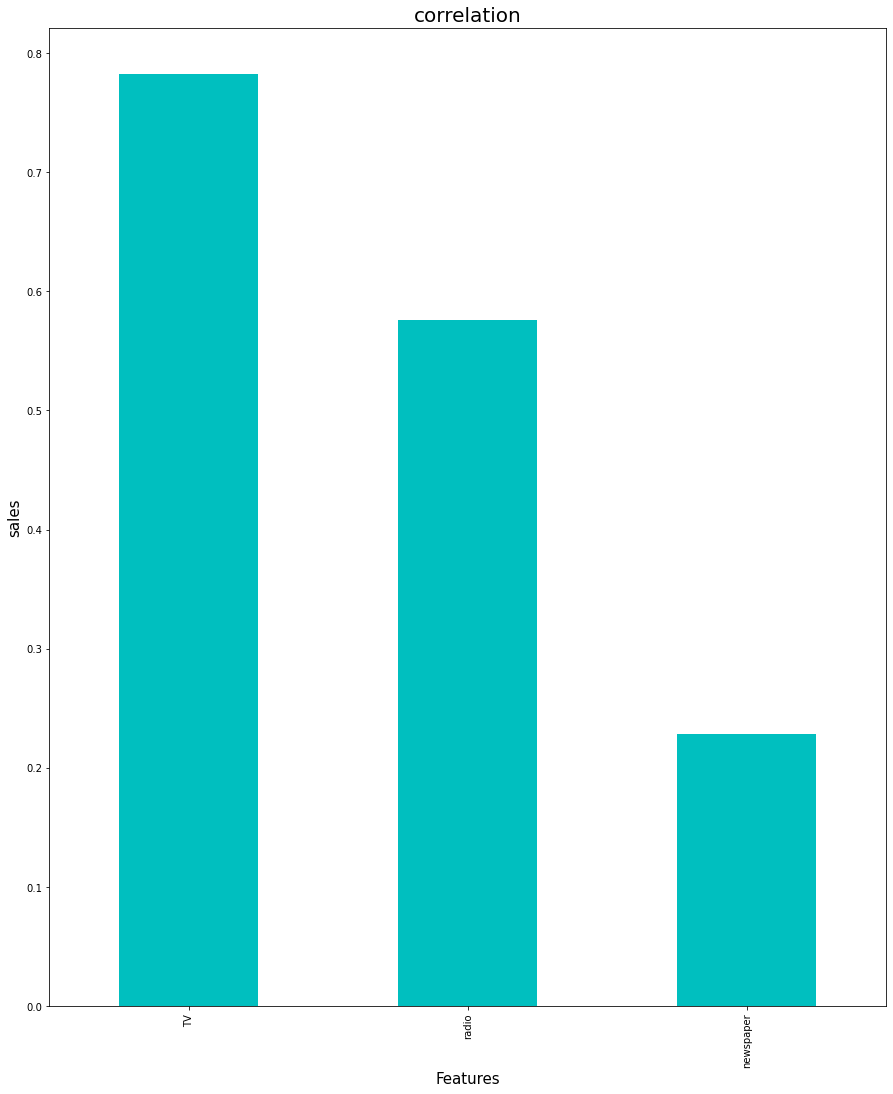

In [27]:
plt.figure(figsize = (15,18))

AdvData.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind='bar',color = 'c')

plt.xlabel('Features',fontsize=15)
plt.ylabel('sales',fontsize = 15)
plt.title('correlation',fontsize = 20)
plt.show()

As per above chart it is cleary showing Sales has the highest correlation with TV and weakest correlation with Newspaper


#  Step 8 : Checking for Skewness and presence of outliers in Feature data

In [28]:
AdvData.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Data distribution in 'newspaper' is skewed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

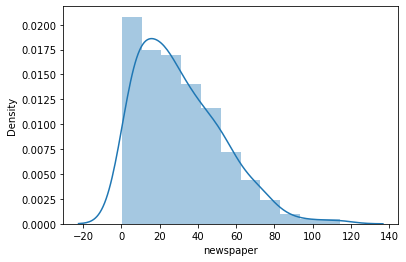

In [29]:
sns.distplot(AdvData['newspaper'])

Data distribution in 'newspaper' is right skewed

#  Step 9 :Outliers Check

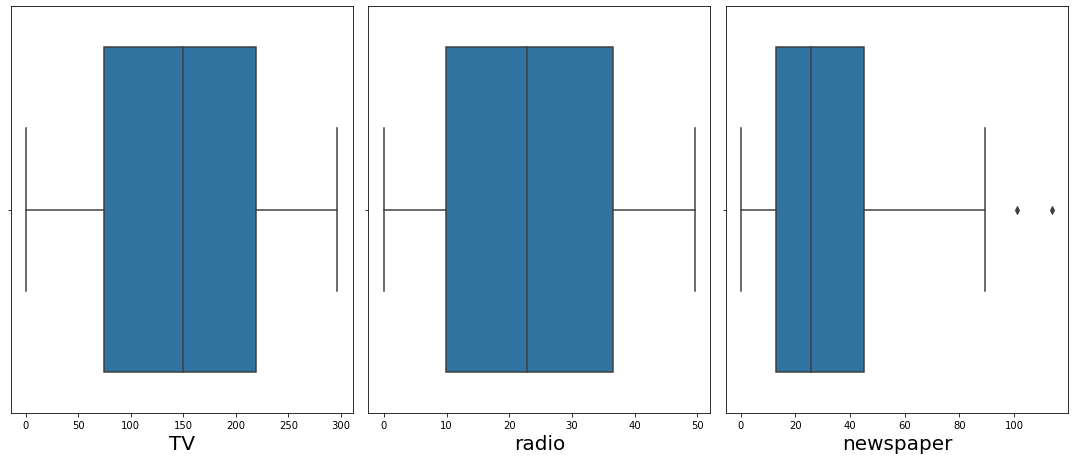

In [30]:
plt.figure(figsize = (20,25),facecolor='white')
plotnum=1

for col in x:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
plt.tight_layout()

"Newspaper" column has some outliers.

#  Step 10 Outliers Removal using IQR method

In [31]:
df = AdvData.copy()

In [32]:
indexdrop = np.array([])

q1 = df['newspaper'].quantile(0.25)
q3 = df['newspaper'].quantile(0.75)
iqr = q3-q1
upperval = q3 + (1.5*iqr)
lowerval = q1 - (1.5*iqr)
col = df['newspaper']
indx = col[(col>upperval) | (col <lowerval)].index
indexdrop  = np.append(indexdrop, indx)

In [33]:
indexdrop

array([ 16., 101.])

In [34]:
df = df.drop(indx)

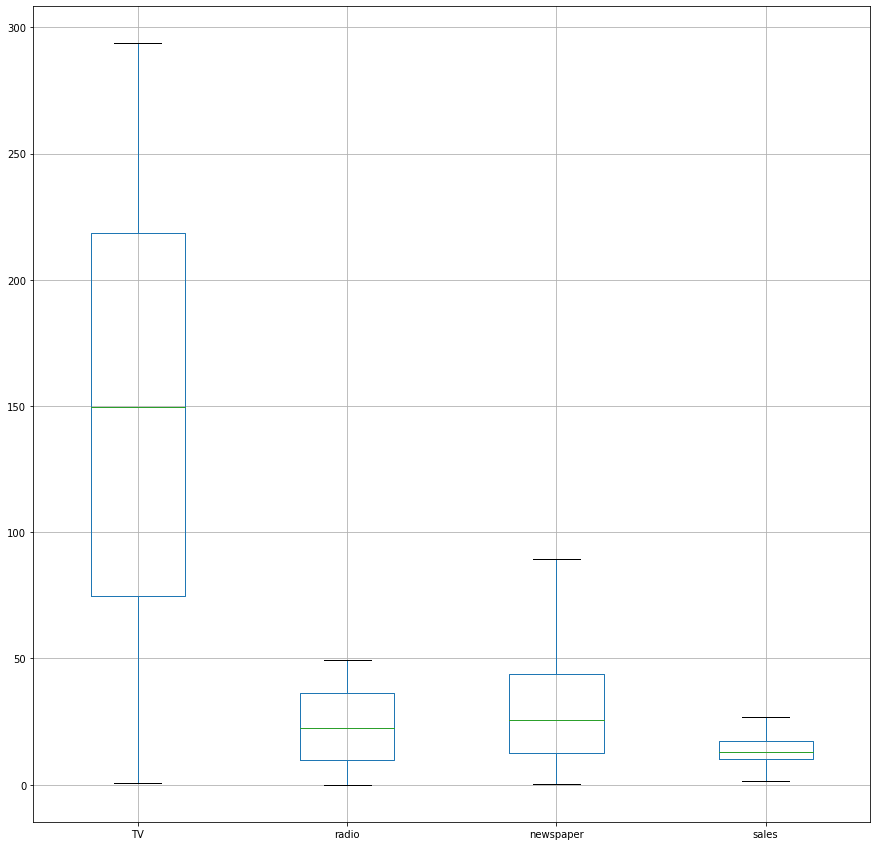

In [35]:
df.boxplot(figsize = [15,15])
plt.show()

In [36]:
df.shape

(198, 4)

In [37]:
AdvData.shape

(200, 4)

#  Step 11 Data Loss check

In [38]:
loss = (200-198)/200*100

In [39]:
loss

1.0

# 1% of data loss is big to accept for further processing 

#  Step 12: Using Z score

In [40]:
df2 = AdvData.copy()

In [41]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]  #taking 3 as threshold value

In [42]:
df3.shape

(198, 4)

In [43]:
AdvData.shape

(200, 4)

#  Step 13:  Data Loss checking

In [44]:
loss = (200-198)/200*100
loss

1.0

In [45]:
AdvData= df.copy()

In [46]:
AdvData.shape

(198, 4)

In [47]:
AdvData.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

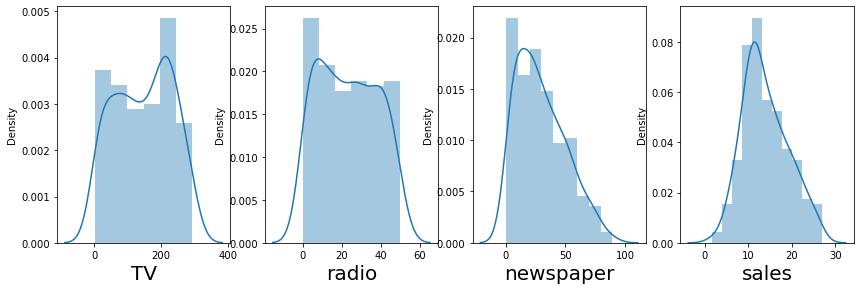

In [48]:
plt.figure(figsize = (18,20),facecolor = 'white')
plotnum = 1

for col in AdvData:
    if plotnum <=10:
        plt.subplot(4,5,plotnum)
        sns.distplot(AdvData[col])
        plt.xlabel(col,fontsize = 20)
    plotnum +=1
plt.show()

        

Outliers removal has reduced the Skewness to some.

#  Step 14: Reduction of  Skewness of data distribution

# Normalising data distribution

Replacing '0' value with their respective column median using simple imputer

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
(AdvData==0).sum()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

In [51]:
si = SimpleImputer(missing_values = 0,strategy = 'most_frequent', verbose = 0)

Imputing the '0' value with most frequently occuring value in the 'radio' column

In [52]:
feat = ['radio']

In [53]:
si = si.fit(AdvData[feat])

In [54]:
AdvData[feat] = si.transform(AdvData[feat])

In [55]:
(AdvData==0).sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#  Step 15: Normalising Data Distribution using Power Transformer

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
powertrans = PowerTransformer(method = 'yeo-johnson', standardize = True)

In [58]:
skew = ['newspaper']

In [59]:
df4 = AdvData[skew]

In [60]:
df4

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


In [61]:
transformed = powertrans.fit_transform(df4)

In [62]:
transformed = pd.DataFrame(transformed, columns = df4.columns) # to convert numpy array back into dataframe

In [63]:
transformed.isnull().sum()

newspaper    0
dtype: int64

In [64]:
transformed.skew()

newspaper   -0.101288
dtype: float64

In [65]:
transformed.index = AdvData.index

In [66]:
AdvData[skew] = transformed[skew]

In [67]:
AdvData.skew()

TV          -0.082332
radio        0.119916
newspaper   -0.101288
sales        0.407130
dtype: float64

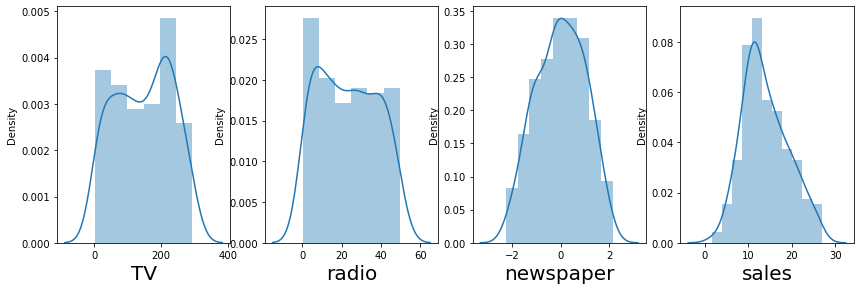

In [68]:
plt.figure(figsize = (18,20),facecolor = 'white')
plotnum = 1

for col in AdvData:
    if plotnum <=10:
        plt.subplot(4,5,plotnum)
        sns.distplot(AdvData[col])
        plt.xlabel(col,fontsize = 20)
    plotnum +=1
plt.show()

#  Step 16:  Distribution look much more normalised 

In [69]:
x = AdvData.drop(columns = 'sales')
y = AdvData['sales']

# This is a regression problem since the target column (sales) has continuous data. 

Feature Selection

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [72]:
scaled_x

array([[ 0.97869734,  0.99009409,  1.6041965 ],
       [-1.19901165,  1.09147939,  0.83104401],
       [-1.51933199,  1.53757474,  1.60705249],
       [ 0.05645636,  1.2266598 ,  1.28376774],
       [ 0.40024339, -0.83484143,  1.28062154],
       [-1.61906543,  1.74034535,  1.76610727],
       [-1.04647815,  0.65214306, -0.10205346],
       [-0.31079737, -0.24004764, -0.84968895],
       [-1.62023876, -1.42287621, -2.09866461],
       [ 0.62317696, -1.38908111, -0.22649933],
       [-0.94557138, -1.17279246, -0.06553382],
       [ 0.79800381,  0.05734926, -1.59608414],
       [-1.44189191,  0.80760053,  1.50859232],
       [-0.57714432, -1.05113009, -1.23269654],
       [ 0.67363035,  0.65890208,  0.86367455],
       [ 0.57155024,  1.65923711,  1.1026083 ],
       [ 1.58061798,  1.11175645,  1.19771741],
       [-0.90919801, -0.17921645, -0.39458775],
       [ 0.0071763 ,  0.05059024, -0.346834  ],
       [ 0.84141719,  0.30743302,  1.11921444],
       [ 1.06435076, -1.2201056 , -0.102

#  Step 17 : Checking for multicolinearity using variance inflation factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()

In [75]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [76]:
vif

,Features,vif
0,TV,1.003201
1,radio,1.097709
2,newspaper,1.096463


There is no multicollinearity

# Step 18 Selecting Kbest feature

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

In [78]:
bestfeat = SelectKBest(score_func = f_classif, k=3)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [79]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score'))

    Features     Score
0         TV  3.672431
1      radio  1.733126
2  newspaper  1.259850


#  Step 19 :Regression Model Building

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state = 1)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [92]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = xg.XGBRegressor()
SV = SVR()
r = Ridge()
l = Lasso()

#  Step 20:Training the model

In [93]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
l.fit(x_train,y_train)

Lasso()

All models have been trained

#  Step 21 Linear Regression Model

In [94]:
y_lr_pred = lr.predict(x_test)

# R2 Score

In [95]:
r2_score(y_test,y_lr_pred)

0.9102155770997384

Mean squared error

In [96]:
mean_squared_error(y_test,y_lr_pred)

2.6204298548555998

#  Step 22 :Ridge Regression Model

In [97]:
y_r_pred = r.predict(x_test)

R2 Score

In [98]:
r2_score(y_test,y_r_pred)

0.9109459519350958

Mean Squared Error

In [99]:
mean_squared_error(y_test,y_r_pred)

2.599113283873887

#  Step 23 Lasso Regression Model

In [100]:
y_l_pred = l.predict(x_test)

R2 Score

In [101]:
r2_score(y_test,y_l_pred)

0.8355268339115316

In [102]:
mean_squared_error(y_test,y_l_pred)

4.800280280462664

#  Step 24: Random Forest Regression Model

In [103]:
y_rf_pred = rf.predict(x_test)

R2 Score

In [104]:
r2_score(y_test,y_rf_pred)

0.9792100422140257

In [105]:
mean_squared_error(y_test,y_rf_pred)

0.6067714677419368

#  Step 25 : XGB Regression Model

In [106]:
y_xg_pred = xg.predict(x_test)

R2 Score

In [107]:
r2_score(y_test,y_xg_pred)

0.9691237997977404

In [108]:
mean_squared_error(y_test,y_xg_pred)

0.9011464817719917

#  Step 26: Support Vector Regression Model

In [109]:
y_sv_pred = SV.predict(x_test)

R2 Score

In [110]:
r2_score(y_test,y_sv_pred)

0.8892722133834817

In [111]:
mean_squared_error(y_test,y_sv_pred)

3.2316785967909745

#  Step 27: Model Cross Validation

In [112]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# 

In [117]:
Linear_Regression=cross_val_score(lr,scaled_x,y,cv=5).mean()
Linear_Regression

0.8862147505839119

In [118]:
Ridge_Regression=cross_val_score(r,scaled_x,y,cv=5).mean()
Ridge_Regression

0.8863030144676898

In [119]:
Random_Forest_Regression=cross_val_score(rf,scaled_x,y,cv=5).mean()
Random_Forest_Regression

0.9757446838386594

In [120]:
Lasso_Regression_Model=cross_val_score(l,scaled_x,y,cv=5).mean()
Lasso_Regression_Model


0.8168183052726793

In [122]:
XGB_Regression_Model=cross_val_score(xg,scaled_x,y,cv=5).mean()
XGB_Regression_Model

0.9680093602530573

In [124]:
SV_Regression_Model=cross_val_score(SV,scaled_x,y,cv=5).mean()
SV_Regression_Model

0.90339584840579

# Based on comparing accuracy score result with Cross Validation result, it is determined that XGB Regression is the best model.

# Hyperparameter tuning

# XGB Regression

In [125]:
parameter = {'booster':["gbtree","gblinear"],'eta':[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [126]:
Gridcv = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose=1)

In [127]:
Gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [128]:
Gridcv.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 20,
 'min_child_weight': 0,
 'subsample': 0.5}

In [129]:
best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1,max_depth = 20,min_child_weight = 0,subsample = 0.5)
best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=20, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
xgbpred = best_mod.predict(x_test)
acc = r2_score(y_test,xgbpred)
print(acc*100)

98.33832409190244


# XGB Regressor has score 98.33%

# Random Forest Regressor

In [131]:
parameters = {'n_estimators':[30,60],'max_depth':[10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [132]:
Gridcv = GridSearchCV(RandomForestRegressor(),parameters, cv=5, n_jobs=-1,verbose = 1)

In [133]:
Gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [134]:
Gridcv.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

In [146]:
best_mod2 = RandomForestRegressor(n_estimators = 60,criterion = 'mae',max_depth = 40,max_features = 'auto',min_samples_leaf = 5,min_samples_split=5) 

In [147]:
best_mod2.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=40, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=60)

In [148]:
rfpred = best_mod2.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

94.07866139872787


# Random Forest Regressor Score is 94.07%

# Therefore XGBRegressor model is the best model

In [149]:
# Saving the model

import joblib

joblib.dump(best_mod,"BestModelaccuracy.pkl")

['BestModelaccuracy.pkl']

# Loading the model

In [151]:
mod = joblib.load('BestModelaccuracy.pkl')

In [152]:
print(mod.predict(x_test))

[12.002528  18.290016  13.400931   6.8776436 24.648434  17.337006
 11.185491  13.060232  21.245358  15.553108  20.11355   14.968205
 17.10218   18.569944  10.175474   6.775741   9.483882  23.107271
 14.132323  18.501772  21.675472  22.935167  16.159458  12.223478
  9.392511  10.118923  21.776134  10.352933  11.831842  19.08987
 15.578061   8.392355   7.971705  10.160602  16.425394  20.267618
 10.185053  12.570906  10.853753  14.736052  19.104973   5.502089
 14.217622  18.927135  11.794735  18.366917  16.902523  17.018227
 10.740648  11.034106  16.748314  11.435119   7.3962617  9.026413
 16.940374  25.176386  14.859114  13.507895  24.608152  19.080517
  5.9071417 24.76901  ]


   #                                                               END